In [31]:
#nomor 2A dan 2B
import numpy as np

def power_method(A, initial_guess, num_iterations, epsilon=1e-6):
    x = initial_guess.astype(float)  # Mengubah tipe data vektor awal menjadi float
    A = A.astype(float)  # Mengubah tipe data matriks A menjadi float
    for _ in range(num_iterations):
        x = np.dot(A, x)
        norm_x = np.linalg.norm(x)
        if norm_x < epsilon:
            break
        x /= norm_x  # Normalisasi vektor
    eigenvalue = np.dot(np.dot(x, A), x)  # Eigenvalue adalah x^T * A * x
    return eigenvalue, x

# Matriks A
A = np.array([[0, 2, 1],
              [2, 3, 2],
              [1, 4, 1]])

# Vektor awal
initial_guess = np.array([1, 0, 0])

# Jumlah iterasi
num_iterations = 10

# Mencari nilai eigen dan vektor eigen menggunakan power method
eigenvalue_power, eigenvector_power = power_method(A, initial_guess, num_iterations)
print("Eigenvalue (Power Method):", eigenvalue_power)
print("Eigenvector (Power Method):", eigenvector_power)

# Mencari nilai eigen dan vektor eigen menggunakan fungsi eig dari numpy.linalg
eigenvalues, eigenvectors = np.linalg.eig(A)
print("\nEigenvalues (numpy.linalg.eig):", eigenvalues)
print("Eigenvectors (numpy.linalg.eig):\n", eigenvectors)


Eigenvalue (Power Method): 5.854101600409583
Eigenvector (Power Method): [0.34426122 0.68852232 0.63829556]

Eigenvalues (numpy.linalg.eig): [ 5.85410197 -0.85410197 -1.        ]
Eigenvectors (numpy.linalg.eig):
 [[ 3.44261227e-01  1.87112744e-01 -1.55431223e-15]
 [ 6.88522453e-01  3.74225487e-01 -4.47213595e-01]
 [ 6.38295417e-01 -9.08264337e-01  8.94427191e-01]]


In [1]:
#nomor 1
import numpy as np

def gauss_seidel(A, b, epsilon, max_iter):
    """
    Menyelesaikan sistem persamaan linear dengan metode Gauss-Seidel.

    Args:
      A: Matriks koefisien sistem persamaan linear.
      b: Vektor konstanta sistem persamaan linear.
      epsilon: Batas toleransi error.
      max_iter: Jumlah iterasi maksimum.

    Returns:
      Vektor solusi sistem persamaan linear, error, dan jumlah iterasi.
    """

    n = len(A)
    x = np.zeros(n)  # Solusi awal
    error = np.inf
    iter_count = 0

    # Iterasi Gauss-Seidel
    for _ in range(max_iter):
        for i in range(n):
            summation = 0
            for j in range(n):
                if j != i:
                    summation -= A[i][j] * x[j]
                    
            x[i] = (b[i] - summation) / A[i][i]

        # Menghitung error
        error = np.linalg.norm(np.dot(A, x) - b)

        iter_count += 1

        # Keluar loop jika error sudah di bawah batas toleransi
        if error < epsilon:
            break

    return x, error, iter_count

# Matriks koefisien dan vektor konstanta
A = np.array([[4, 1, -2], [-2, -8, -7], [1, 1, 8]])
b = np.array([2, 5, -3])

# Nilai epsilon dan iterasi maksimum
epsilon = 0.01
max_iter = 100

# Menjalankan metode Gauss-Seidel
x, error, iter_count = gauss_seidel(A, b, epsilon, max_iter)

# Menampilkan hasil
print(f"Solusi: {x}")
print(f"Error: {error}")
print(f"Jumlah iterasi: {iter_count}")


Solusi: [ 0.49333333 -0.87111111 -0.42222222]
Error: 4.009962901216894
Jumlah iterasi: 100


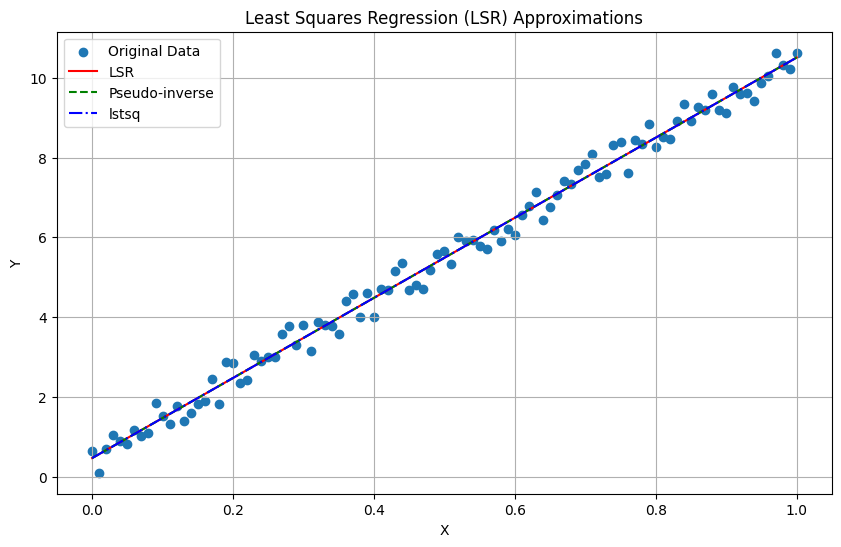

In [33]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
y = 10 * x + np.random.random(len(x))  


X = np.column_stack([x, np.ones_like(x)])  
beta_ls = np.linalg.inv(X.T @ X) @ X.T @ y  
y_ls = X @ beta_ls  


beta_pseudo = np.linalg.pinv(X) @ y  
y_pseudo = X @ beta_pseudo  


beta_lstsq = np.linalg.lstsq(X, y, rcond=None)[0]  
y_lstsq = X @ beta_lstsq  


plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')  
plt.plot(x, y_ls, label='LSR', color='r')  
plt.plot(x, y_pseudo, label='Pseudo-inverse', linestyle='--', color='g')  
plt.plot(x, y_lstsq, label='lstsq', linestyle='-.', color='b')  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Regression (LSR) Approximations')
plt.legend()
plt.grid(True)
plt.show()


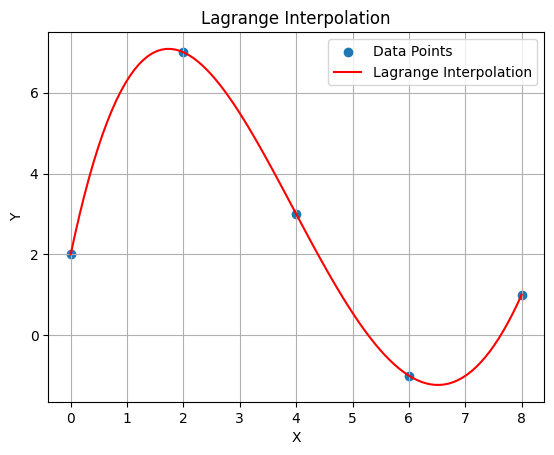

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def my_lagrange(x, y, X):
    Y = []  
    for x_val in X:
        lagrange_sum = 0 
        for i in range(len(x)):
            basis = 1 
            for j in range(len(x)):
                if j != i:
                    basis *= (x_val - x[j]) / (x[i] - x[j])
            lagrange_sum += y[i] * basis 

        Y.append(lagrange_sum) 

    return Y

x = [0, 2, 4, 6, 8]
y = [2, 7, 3, -1, 1]

X = np.linspace(min(x), max(x), 100)

Y = my_lagrange(x, y, X)

plt.scatter(x, y, label='Data Points')
plt.plot(X, Y, label='Lagrange Interpolation', color='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()
